In [1]:
import numpy as np
from PIL import Image
from astropy.io import fits as pyfits

In [2]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [3]:
%cd greyscale2rgb

[WinError 2] The system cannot find the file specified: 'greyscale2rgb'
C:\Users\Ben Rosenbluth\Desktop\greyscale2rgb


In [4]:
%matplotlib inline

In [5]:
%ls

 Volume in drive C is OS
 Volume Serial Number is A03D-9BD8

 Directory of C:\Users\Ben Rosenbluth\Desktop\greyscale2rgb

05/24/2019  08:32 PM    <DIR>          .
05/24/2019  08:32 PM    <DIR>          ..
05/24/2019  02:16 PM    <DIR>          .ipynb_checkpoints
05/24/2019  08:32 PM    <DIR>          20190523_rg
05/24/2019  03:26 PM         2,462,400 blue.fits
05/24/2019  12:58 PM            26,215 fc2_save_2019-05-23-094552-0003.jpg
05/24/2019  12:58 PM            22,432 fc2_save_2019-05-23-094552-0004.jpg
05/24/2019  03:26 PM           311,040 green.fits
05/24/2019  02:33 PM    <DIR>          green_images
05/24/2019  08:32 PM         9,205,784 greyscale2rgb.ipynb
05/24/2019  03:26 PM           311,040 red.fits
05/24/2019  02:28 PM    <DIR>          red_images
               6 File(s)     12,338,911 bytes
               6 Dir(s)  315,117,600,768 bytes free


Image size: 640 x 480


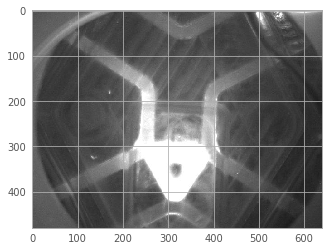

In [6]:
image_green = Image.open('fc2_save_2019-05-23-094552-0003.jpg')
xsize, ysize = image_green.size
print("Image size: {} x {}".format(xsize, ysize))
plt.imshow(image_green)

Image size: 640 x 480


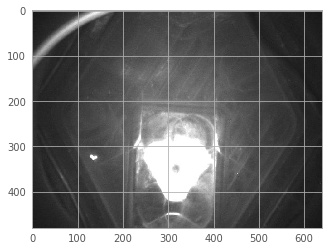

In [7]:
image_red = Image.open('fc2_save_2019-05-23-094552-0004.jpg')
xsize, ysize = image_red.size
print("Image size: {} x {}".format(xsize, ysize))
plt.imshow(image_red)

In [8]:
green = pyfits.PrimaryHDU(data=image_green)
green.header['LATOBS'] = "32:11:56" # add spurious header info
green.header['LONGOBS'] = "110:56"
green.writeto('green.fits')

OSError: File 'green.fits' already exists.

In [ ]:
red = pyfits.PrimaryHDU(data=image_red)
red.header['LATOBS'] = "32:11:56" # add spurious header info
red.header['LONGOBS'] = "110:56"
red.writeto('red.fits')

In [9]:
image_blue = np.zeros((480,  640))

In [10]:
image_blue.shape

(480, 640)

In [11]:
blue = pyfits.PrimaryHDU(data=image_blue)
blue.header['LATOBS'] = "32:11:56" # add spurious header info
blue.header['LONGOBS'] = "110:56"
blue.writeto('blue.fits')

OSError: File 'blue.fits' already exists.

In [12]:
blue.shape

(480, 640)

In [13]:
red.shape

NameError: name 'red' is not defined

In [14]:
red_data=pyfits.getdata('red.fits')
green_data=pyfits.getdata('green.fits')
blue_data=pyfits.getdata('blue.fits')

In [15]:
colorized=np.zeros((red_data.shape[0],green_data.shape[1],3),dtype=int)

In [16]:
colorized[:,:,0]=red_data; colorized[:,:,1]=green_data; colorized[:,:,2]=blue_data

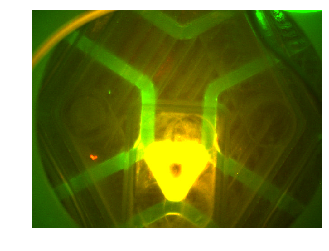

<Figure size 432x288 with 0 Axes>

In [17]:
plt.imshow(colorized,origin='upper',interpolation='none')
plt.axis('off')
plt.grid(b=None)
plt.show()
plt.clf()

In [18]:
%cd 20190523_rg/

C:\Users\Ben Rosenbluth\Desktop\greyscale2rgb\20190523_rg


In [19]:
%ls

 Volume in drive C is OS
 Volume Serial Number is A03D-9BD8

 Directory of C:\Users\Ben Rosenbluth\Desktop\greyscale2rgb\20190523_rg

05/24/2019  08:32 PM    <DIR>          .
05/24/2019  08:32 PM    <DIR>          ..
05/24/2019  08:17 PM           311,040 1_green.fits
05/24/2019  08:17 PM           311,040 1_red.fits
05/24/2019  08:17 PM           311,040 10_green.fits
05/24/2019  08:17 PM           311,040 10_red.fits
05/24/2019  08:17 PM           311,040 11_green.fits
05/24/2019  08:17 PM           311,040 11_red.fits
05/24/2019  08:17 PM           311,040 12_green.fits
05/24/2019  08:17 PM           311,040 12_red.fits
05/24/2019  08:17 PM           311,040 13_green.fits
05/24/2019  08:17 PM           311,040 13_red.fits
05/24/2019  08:17 PM           311,040 14_green.fits
05/24/2019  08:17 PM           311,040 14_red.fits
05/24/2019  08:17 PM           311,040 15_green.fits
05/24/2019  08:17 PM           311,040 15_red.fits
05/24/2019  08:17 PM           311,040 16_green.fits
05/2

In [20]:
from pims import ImageSequence

In [21]:
images = ImageSequence('fc2_save_2019-05-23-094552-*.jpg')

In [22]:
images

<Frames>
Source: C:\Users\Ben Rosenbluth\Desktop\greyscale2rgb\20190523_rg\fc2_save_2019-05-23-094552-*.jpg
Length: 133 frames
Frame Shape: (480, 640)
Pixel Datatype: uint8

In [23]:
red_images = images[::2]

In [24]:
red_images

Sliced ImageSequence. Original repr:
    <Frames>
    Source: C:\Users\Ben Rosenbluth\Desktop\greyscale2rgb\20190523_rg\fc2_save_2019-05-23-094552-*.jpg
    Length: 133 frames
    Frame Shape: (480, 640)
    Pixel Datatype: uint8

In [ ]:
red_images[0]

In [ ]:
red_images[1]

In [ ]:
red_images[2]

In [ ]:
red_images[3]

In [25]:
green_images = images[1::2]

In [26]:
green_images

Sliced ImageSequence. Original repr:
    <Frames>
    Source: C:\Users\Ben Rosenbluth\Desktop\greyscale2rgb\20190523_rg\fc2_save_2019-05-23-094552-*.jpg
    Length: 133 frames
    Frame Shape: (480, 640)
    Pixel Datatype: uint8

Frame([[120, 113, 101, ..., 255, 255, 251],
       [ 76,  75,  73, ..., 249, 246, 241],
       [ 76,  78,  79, ..., 188, 178, 168],
       ..., 
       [ 78,  79,  81, ...,  48,  47,  46],
       [ 79,  80,  81, ...,  47,  46,  45],
       [ 76,  77,  79, ...,  46,  44,  43]], dtype=uint8)
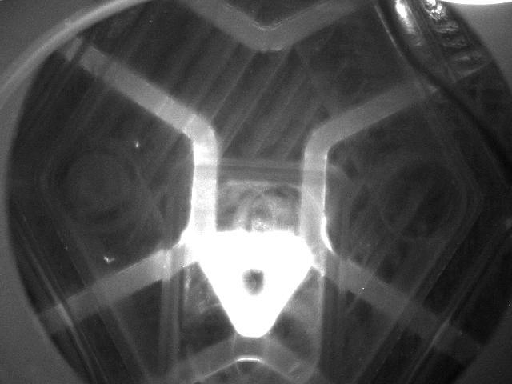

In [27]:
green_images[0]

In [ ]:
green_images[1]

In [28]:
i = 0
for image_green in green_images:
    i = i+1
    green = pyfits.PrimaryHDU(data=image_green)
    green.header['LATOBS'] = "32:11:56" # add spurious header info
    green.header['LONGOBS'] = "110:56"
    green.writeto('{}_green.fits'.format(i))

OSError: File '1_green.fits' already exists.

In [29]:
i = 0
for image_red in red_images:
    i = i+1
    red = pyfits.PrimaryHDU(data=image_red)
    red.header['LATOBS'] = "32:11:56" # add spurious header info
    red.header['LONGOBS'] = "110:56"
    red.writeto('{}_red.fits'.format(i))

OSError: File '1_red.fits' already exists.

In [30]:
blue = pyfits.PrimaryHDU(data=image_blue)
blue.header['LATOBS'] = "32:11:56" # add spurious header info
blue.header['LONGOBS'] = "110:56"
blue.writeto('blue.fits')

OSError: File 'blue.fits' already exists.

In [ ]:
len(images)

In [31]:
for x in range(2,10):
    print(x)

2
3
4
5
6
7
8
9


In [32]:
rangeMax = len(images)/2

In [33]:
intRangeMax = int(rangeMax)

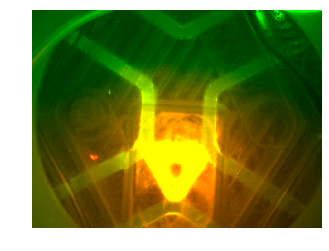

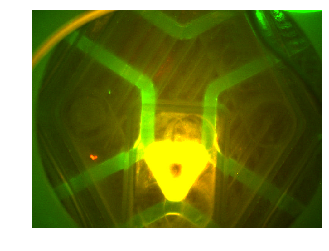

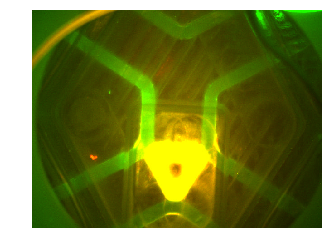

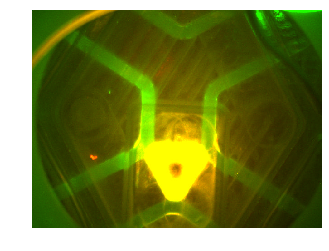

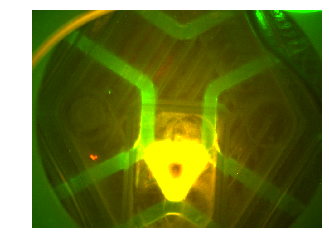

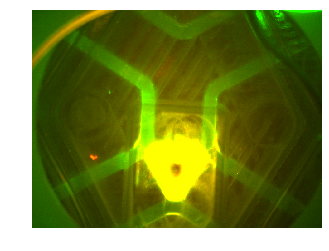

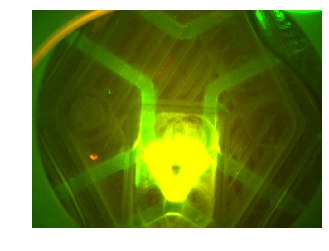

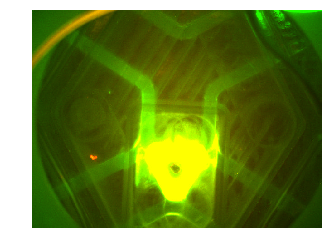

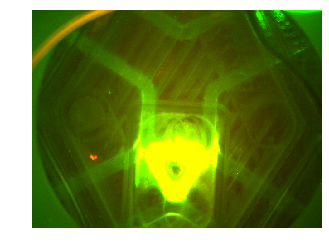

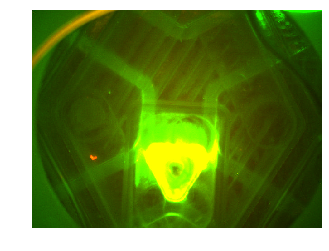

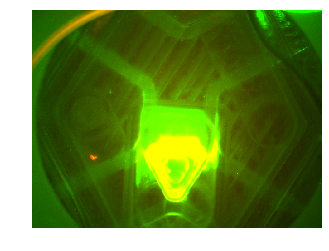

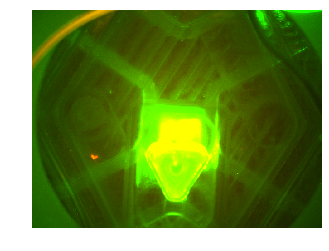

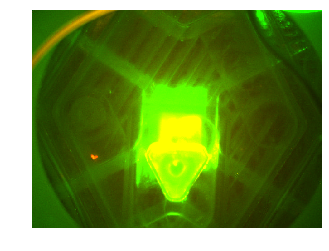

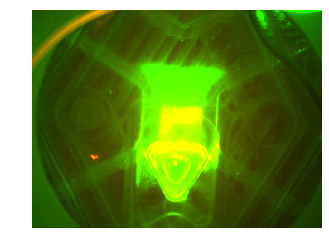

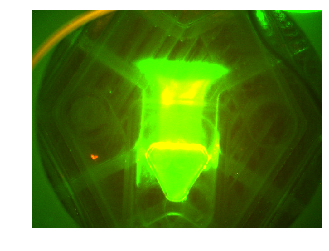

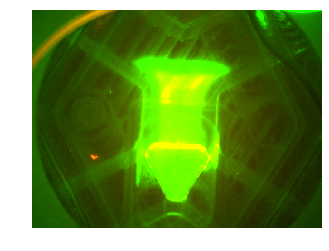

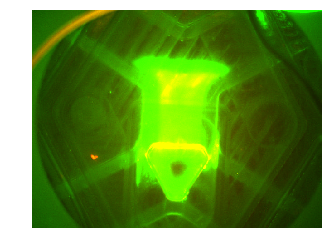

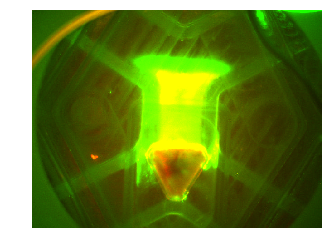

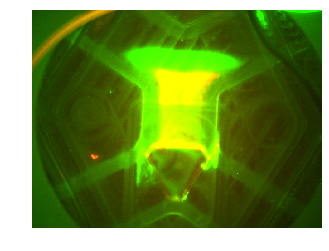

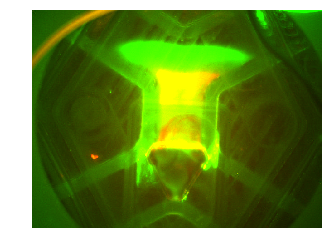

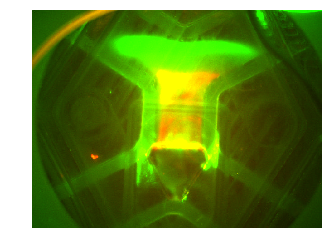

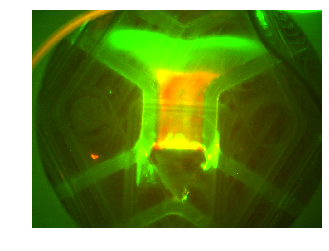

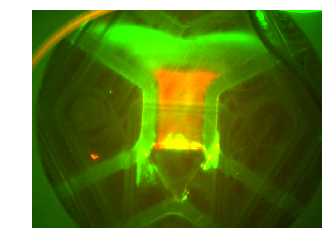

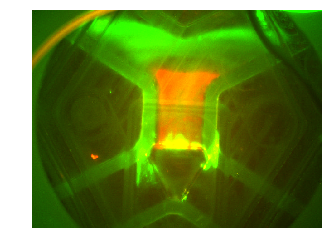

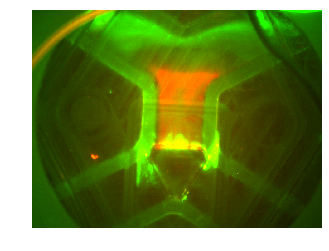

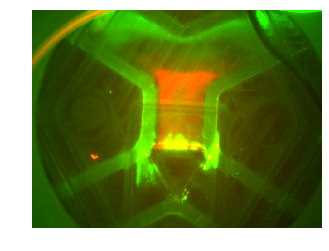

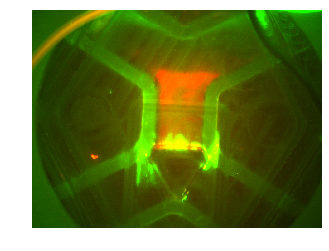

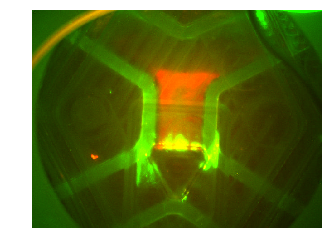

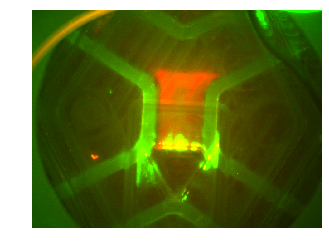

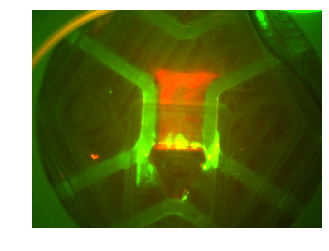

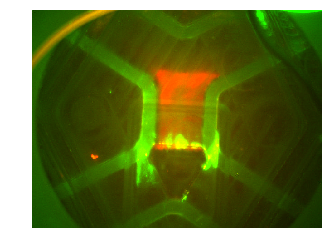

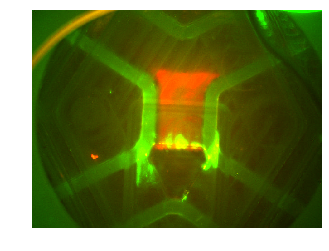

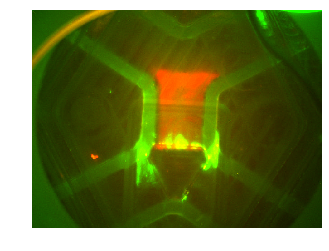

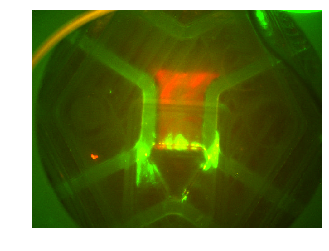

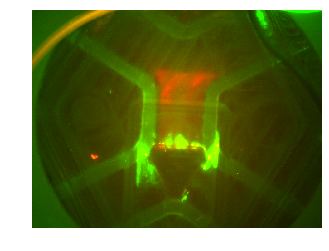

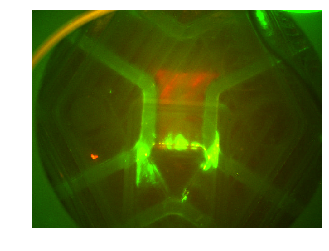

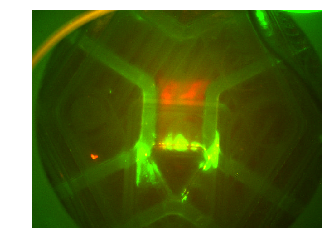

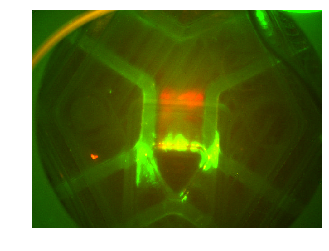

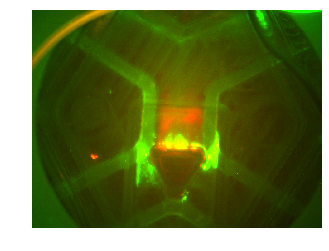

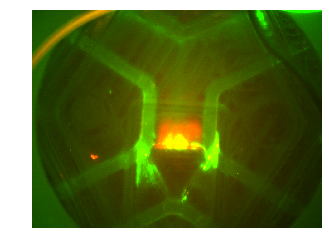

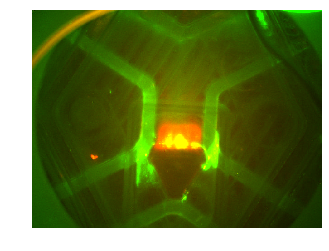

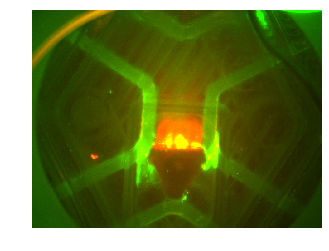

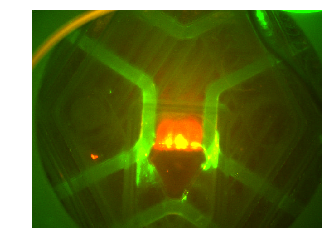

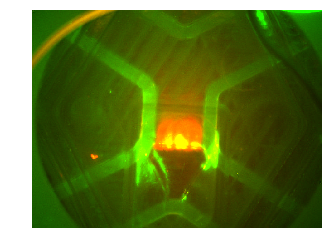

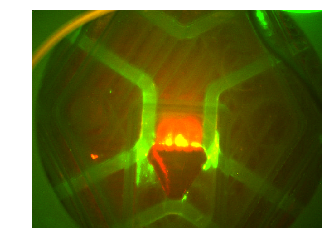

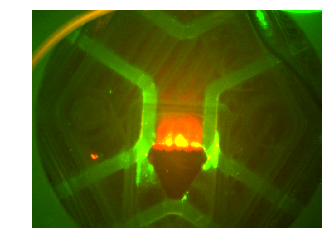

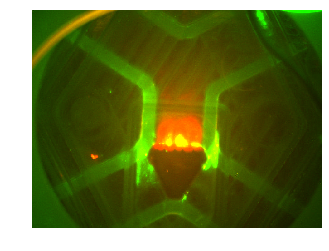

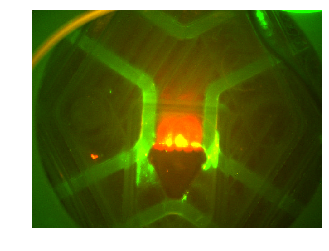

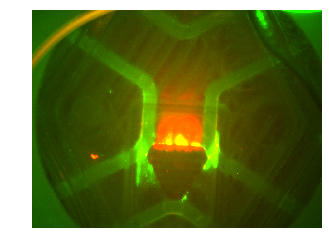

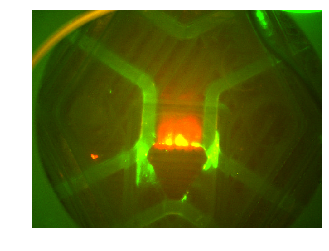

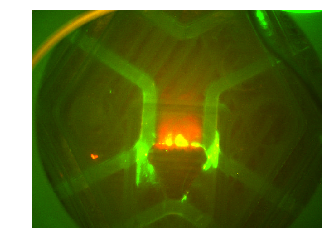

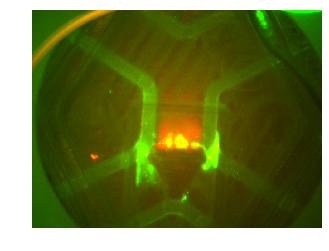

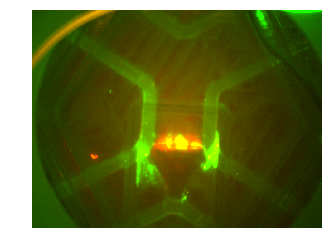

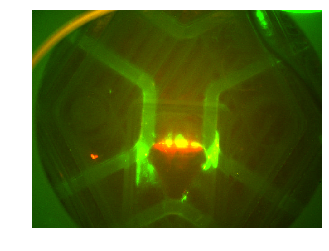

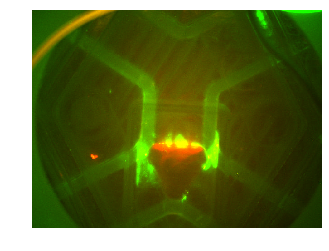

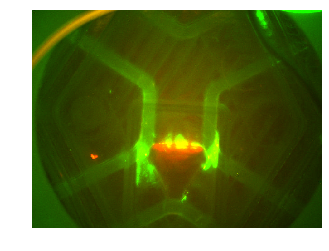

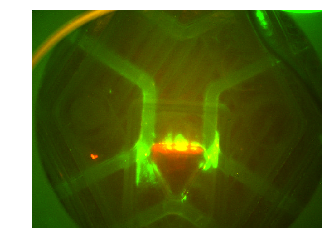

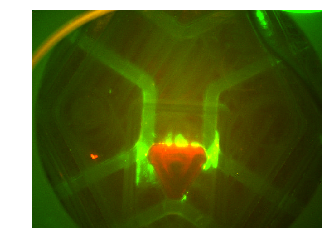

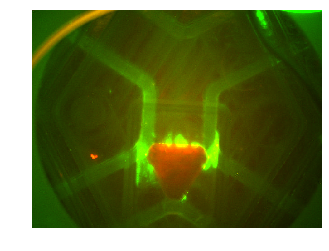

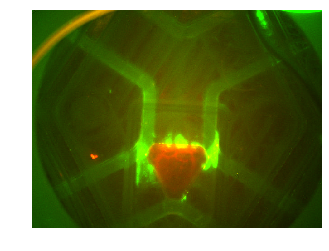

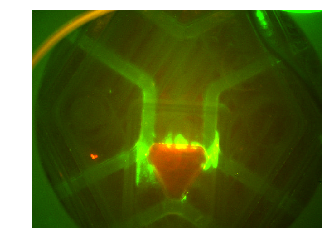

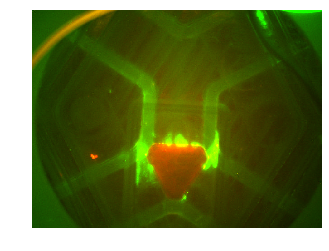

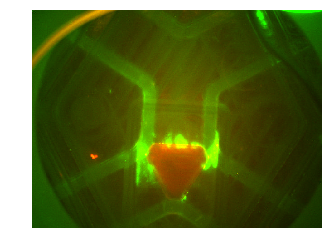

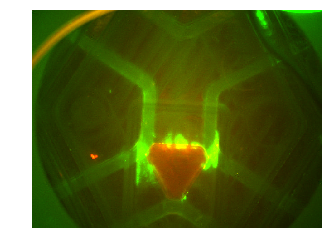

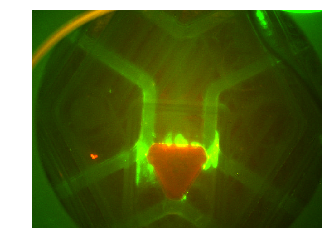

In [34]:
for i in range(1,intRangeMax):
    red_data = pyfits.getdata('{}_red.fits'.format(i))
    green_data = pyfits.getdata('{}_green.fits'.format(i))
    blue_data = pyfits.getdata('blue.fits')
    
    colorized=np.zeros((red_data.shape[0],green_data.shape[1],3),dtype=int)
    colorized[:,:,0]=red_data; colorized[:,:,1]=green_data; colorized[:,:,2]=blue_data
    
    fig = plt.imshow(colorized,origin='upper',interpolation='nearest')
    plt.axis('off')
    plt.grid(b=None)
    
    plt.savefig('colorized_{}.jpeg'.format(i), dpi=100)
        
    plt.show()

In [ ]:
red_data

In [ ]:
%cd ..

NameError: name 'image' is not defined

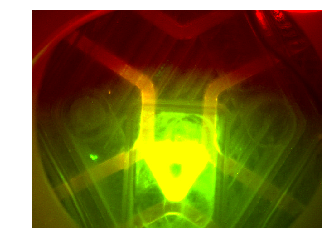

In [36]:
## colors reversed: ()


for i in range(1,intRangeMax):
    green_data = pyfits.getdata('{}_red.fits'.format(i)) #here it's nbackwards
    red_data = pyfits.getdata('{}_green.fits'.format(i)) #here it's backwards
    blue_data = pyfits.getdata('blue.fits')
    
    colorized=np.zeros((red_data.shape[0],green_data.shape[1],3),dtype=int)
    colorized[:,:,0]=red_data; colorized[:,:,1]=green_data; colorized[:,:,2]=blue_data
    
    fig = plt.imshow(colorized,origin='upper',interpolation='nearest')
    plt.axis('off')
    plt.grid(b=None)
    
    plt.savefig('flipped_colorized_{}.jpeg'.format(i), dip=300)
        
    plt.show()